# CODSOFT Data Science Internship Task 2 - MOVIE RATING PREDICTION WITH PYTHON
#### By Bhavya Sri Pragada

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/kaggle/input/imdb-india-movies/IMDb Movies India.csv',encoding='ISO-8859-1')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [4]:
data.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


## Data Analysis

In [5]:
import plotly.express as px
fig_year = px.histogram(
    data, 
    x='Year', 
    histnorm='probability density', 
    nbins=30, 
    title='Distribution of Year'
)
fig_year.show()

In [6]:
data.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

### Many duplicates are there, so it is suggestable to drop them

In [7]:
data=data.dropna()

## Data preprocessing

In [9]:
data.drop(columns=['Name','Duration'],axis='columns',inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Year      5659 non-null   object 
 1   Genre     5659 non-null   object 
 2   Rating    5659 non-null   float64
 3   Votes     5659 non-null   object 
 4   Director  5659 non-null   object 
 5   Actor 1   5659 non-null   object 
 6   Actor 2   5659 non-null   object 
 7   Actor 3   5659 non-null   object 
dtypes: float64(1), object(7)
memory usage: 397.9+ KB


In [11]:
data.head()

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


In [12]:
data['Year']= data['Year'].str.strip('()').astype(int)

### Label Encoding

In [13]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [14]:
label_cols = {}
categorical_columns = ['Genre', 'Votes','Director', 'Actor 1', 'Actor 2', 'Actor 3']
for column in categorical_columns:
    LE = LabelEncoder()
    data[column] = LE.fit_transform(data[column])
    label_cols[column] = LE

In [15]:
data

,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,229,7.0,1843,629,1352,2272,319
3,2019,184,4.4,1164,1335,1198,719,2148
5,1997,157,4.7,1892,1530,378,75,2045
6,2005,289,7.4,34,2044,692,1112,2524
8,2012,320,5.6,1133,135,1934,1175,1013
...,...,...,...,...,...,...,...,...
15493,2015,229,6.1,1312,1223,1861,1801,1615
15494,2001,133,6.2,178,2059,763,1619,1184
15503,1989,28,5.8,1348,1793,406,754,1685
15505,1999,38,4.5,1681,1025,112,2164,314


In [16]:
X=data.drop(columns=['Rating'],axis='columns')
Y=data['Rating']

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

### Split the data

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

MSE={}
R2={}
for name, model in models.items():
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    mse = mean_squared_error(Y_test, Y_pred)
    MSE[name]=mse
    r2 = r2_score(Y_test, Y_pred)
    R2[name]=r2
    print(f"{name} - MSE: {mse:.4f}, R2: {r2:.4f}")


Linear Regression - MSE: 1.7432, R2: 0.0586
Decision Tree - MSE: 3.0869, R2: -0.6670
Random Forest - MSE: 1.5918, R2: 0.1404
Gradient Boosting - MSE: 1.5266, R2: 0.1756


<Axes: title={'center': 'MSE Scores of each Model'}, xlabel='Model', ylabel='MSE Score'>

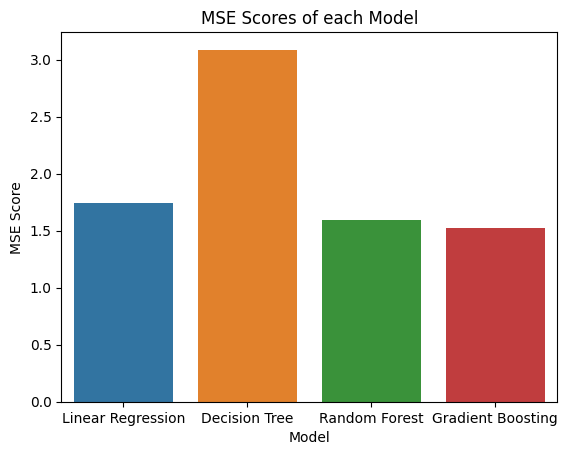

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

MSE_data = pd.DataFrame(list(MSE.items()),columns=['Model','MSE Score'])
plt.title("MSE Scores of each Model")
sns.barplot(x='Model',y='MSE Score',data=MSE_data)

<Axes: title={'center': 'R2 Scores of each model'}, xlabel='Model', ylabel='R2 Score'>

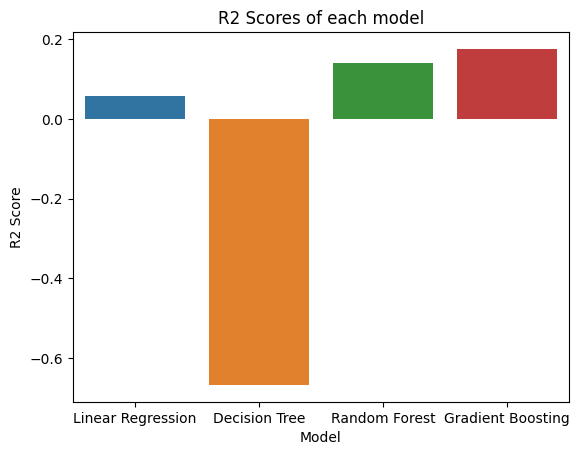

In [21]:
R2_data=pd.DataFrame(list(R2.items()),columns=['Model','R2 Score'])
plt.title('R2 Scores of each model')
sns.barplot(x='Model',y='R2 Score',data=R2_data)

# It can be concluded that Gradient Boosting model has given better performance in predicting the movie ratings 
# by having lower MSE score (1.5266) and highest R2 score (0.1756) among the 4 ML models used.